In [1]:
from clipp2.core_cuda import *
from clipp2.preprocess import *

In [2]:
df1 = process_files('AVPC/ACC55/55-post.snv.txt', 'AVPC/ACC55/55-post.cna.txt','AVPC/ACC55/55-post.purity.txt')
df2 = process_files('AVPC/ACC55/55-pre.snv.txt', 'AVPC/ACC55/55-pre.cna.txt','AVPC/ACC55/55-pre.purity.txt')

Loaded SNV data from AVPC/ACC55/55-post.snv.txt with shape (9952, 4)
Loaded CNA data from AVPC/ACC55/55-post.cna.txt with shape (355, 5)
Purity: 0.87
Constructed df with shape (9952, 11)
Loaded SNV data from AVPC/ACC55/55-pre.snv.txt with shape (8956, 4)
Loaded CNA data from AVPC/ACC55/55-pre.cna.txt with shape (312, 5)
Purity: 0.67
Constructed df with shape (8956, 11)


In [3]:
[df1, df2] = insert_distinct_rows_multi([df1, df2])

1376
2372


In [4]:
export_snv_cna_and_purity(
        df1,
        dir="AVPC/ACC55pre/",
        snv_path="55post.snv.txt",
        cna_path="55post.cna.txt",
        purity_path="55post.purity.txt"
    )


In [5]:
export_snv_cna_and_purity(
        df2,
        dir="AVPC/ACC55pre/",
        snv_path="55pre.snv.txt",
        cna_path="55pre.cna.txt",
        purity_path="55pre.purity.txt"
    )

In [6]:
snv_file1     = pd.read_csv("AVPC/ACC55pre/55post.snv.txt", sep="\t", index_col=0)
snv_file2     = pd.read_csv("AVPC/ACC55pre/55pre.snv.txt", sep="\t", index_col=0)


In [7]:
snv_file      = "AVPC/ACC55pre/55post.snv.txt"
cn_file       = "AVPC/ACC55pre/55post.cna.txt"
purity_file   = "AVPC/ACC55pre/55post.purity.txt"
sample_id     = "sample_id"   # not heavily used in logic
output_prefix = "E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55post"

# Call function with drop_data=True (to replicate R code's dropping logic)
preprocess(
    snv_file, cn_file, purity_file, sample_id, output_prefix, 
    drop_data=False
)

SNV file:      AVPC/ACC55pre/55post.snv.txt
CNV file:      AVPC/ACC55pre/55post.cna.txt
Purity file:   AVPC/ACC55pre/55post.purity.txt
Sample ID:     sample_id
Output dir:    E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55post
drop_data:     False
Finished processing. Results saved under: E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55post
Note: drop_data=False, so no rows were actually removed. All data are included in the output files.


e:\Dropbox\GitHub\Multi_Region_CliPP\clipp2\preprocess.py:499: RuntimeWarning: invalid value encountered in scalar divide
  a3 = (actual_theta[No_w-1] - actual_theta[j]) / denom_3


In [8]:
snv_file      = "AVPC/ACC55pre/55pre.snv.txt"
cn_file       = "AVPC/ACC55pre/55pre.cna.txt"
purity_file   = "AVPC/ACC55pre/55pre.purity.txt"
sample_id     = "--sample_id"   # not heavily used in logic
output_prefix = "E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55pre"

# Call function with drop_data=True (to replicate R code's dropping logic)
preprocess(
    snv_file, cn_file, purity_file, sample_id, output_prefix, 
    drop_data=False
)

SNV file:      AVPC/ACC55pre/55pre.snv.txt
CNV file:      AVPC/ACC55pre/55pre.cna.txt
Purity file:   AVPC/ACC55pre/55pre.purity.txt
Sample ID:     --sample_id
Output dir:    E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55pre
drop_data:     False
Finished processing. Results saved under: E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55pre
Note: drop_data=False, so no rows were actually removed. All data are included in the output files.


e:\Dropbox\GitHub\Multi_Region_CliPP\clipp2\preprocess.py:499: RuntimeWarning: invalid value encountered in scalar divide
  a3 = (actual_theta[No_w-1] - actual_theta[j]) / denom_3


In [9]:
root_dir = "E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data"
(r, n, minor, total, purity, coef_list, wcut, drop) = group_all_regions_for_ADMM(root_dir)
sample_size = np.shape(r)[0]
sample_size_new = int(sample_size * 0.5)

# Randomly choose 'sample_size' distinct row indices from [0..n-1]
row_indices = np.random.choice(sample_size, size=sample_size_new, replace=False)

r = r[row_indices, :]
n = n[row_indices, :]
minor = minor[row_indices, :]
total = total[row_indices, :]
r[np.isnan(r)] = 1
n[np.isnan(n)] = 1000
minor[np.isnan(minor)] = 1
total[np.isnan(total)] = 2
coef_list = [x[row_indices, :] for x in coef_list]
import pickle
with open('rows.pkl', 'wb') as f:
    pickle.dump(row_indices, f)

Loaded region 'acc55post': r.shape=(11328,), coef.shape=(11328, 6), purity=0.87
Loaded region 'acc55pre': r.shape=(11328,), coef.shape=(11328, 6), purity=0.67

=== Summary of grouped data before dropping rows ===
Found M=2 regions. r shape= (11328, 2), n= (11328, 2)
minor= (11328, 2), total= (11328, 2)
coef_list length= 2 (each is (No_mutation,6))
wcut= [-0.18  1.8 ]

Dropped 0 rows that were all-zero in r/n/minor/total/coef.

=== Summary of grouped data after dropping rows ===
r shape= (11328, 2), n= (11328, 2)
minor= (11328, 2), total= (11328, 2)
coef_list length= 2, each => shape (11328, 6)


In [10]:
res = clipp2(
    r, n, minor, total,
    purity, 
    coef_list, 
    Lambda=0.6)
lab = res["label"]
centroid = res['phi']

Iter=1, alpha=0.8160, residual=2
Iter=2, alpha=0.8323, residual=1.05152
Iter=3, alpha=0.8490, residual=0.728644
Iter=4, alpha=0.8659, residual=0.647761
Iter=5, alpha=0.8833, residual=0.678639
Iter=6, alpha=0.9009, residual=0.683956
Iter=7, alpha=0.9189, residual=0.70987
Iter=8, alpha=0.9373, residual=0.658041
Iter=9, alpha=0.9561, residual=0.635791
Iter=10, alpha=0.9752, residual=0.65913
Iter=11, alpha=0.9947, residual=0.628207
Iter=12, alpha=1.0146, residual=0.663829
Iter=13, alpha=1.0349, residual=0.61933
Iter=14, alpha=1.0556, residual=0.488274
Iter=15, alpha=1.0767, residual=0.413757
Iter=16, alpha=1.0982, residual=0.554414
Iter=17, alpha=1.1202, residual=0.575836
Iter=18, alpha=1.1426, residual=0.459431
Iter=19, alpha=1.1654, residual=0.318485
Iter=20, alpha=1.1888, residual=0.329322

ADMM finished.



In [11]:
np.unique(lab)

array([0., 1., 2., 3.])

In [12]:
fraction_t = r / (n + 1e-12)
phi_hat  = fraction_t * ((2 * np.ones(np.shape(r)) - purity * np.ones(np.shape(r)) *2 * np.ones(np.shape(r))) + (purity * np.ones(np.shape(r))*total) / (minor + 1e-12))


In [13]:
import pickle

with open('ccf.pkl', 'wb') as f:
    pickle.dump(phi_hat, f)
with open('label.pkl', 'wb') as f:
    pickle.dump(lab, f)
with open('centroid.pkl', 'wb') as f:
    pickle.dump(centroid, f)

In [14]:
centroid

array([[0.87501556, 0.6677607 ],
       [0.00226279, 0.15525787],
       [0.87501556, 0.6677607 ],
       ...,
       [0.87501556, 0.6677607 ],
       [0.87501556, 0.6677607 ],
       [0.87501556, 0.6677607 ]])

In [1]:
import pandas as pd
snv_df = pd.read_csv('AVPC/ACC55pre/55pre.snv.txt', header=0, sep="\t")

row_ind = [_ for _ in range(snv_df.shape[0])]
vals = [(snv_df['chromosome_index'][i], snv_df['position'][i]) for i in  range(snv_df.shape[0])]
dict1 = dict(zip(row_ind, vals))


In [2]:
import pickle

with open('rows.pkl', 'rb') as f:
    rows = pickle.load(f)

In [3]:
keys = [dict1[i] for i in rows]

In [4]:
with open('label.pkl', 'rb') as f:
    lab = pickle.load(f)
dic2 = dict(zip(keys, lab))


In [5]:
import pickle
with open('label.pkl', 'rb') as f:
    lab = pickle.load(f)
with open('ccf.pkl', 'rb') as f:
    ccf_corrected = pickle.load(f)
with open('centroid.pkl', 'rb') as f:
    centroid = pickle.load(f)

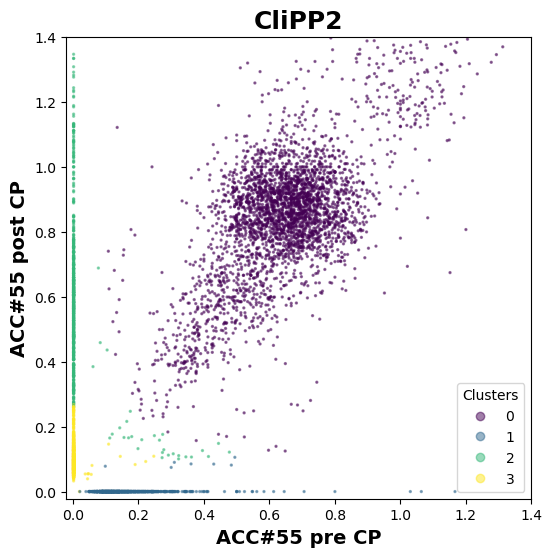

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# Create a scatter plot and save the returned PathCollection object in 'sc'
sc = plt.scatter(
    ccf_corrected[:, 1],
    ccf_corrected[:, 0],
    c=lab,            # coloring by the 'lab' array
    cmap='viridis',   # or another colormap
    s=2,
    alpha=0.5
)

# Axis limits
plt.xlim(-0.02, 1.4)
plt.ylim(-0.02, 1.4)

# Labels and title
plt.xlabel('ACC#55 pre CP', fontsize=14, fontweight='bold')
plt.ylabel('ACC#55 post CP', fontsize=14, fontweight='bold')
plt.title('CliPP2', fontsize=18, fontweight='bold')

# Remove the color bar (delete or comment out the colorbar line)
# plt.colorbar(label="Cluster Label")

# Create a legend for the scatter by extracting legend handles/labels
legend_handles, legend_labels = sc.legend_elements(prop="colors", alpha=0.5)
plt.legend(
    handles=legend_handles,
    labels=legend_labels,
    title="Clusters",
    loc="best"
)

plt.grid(False)
plt.show()


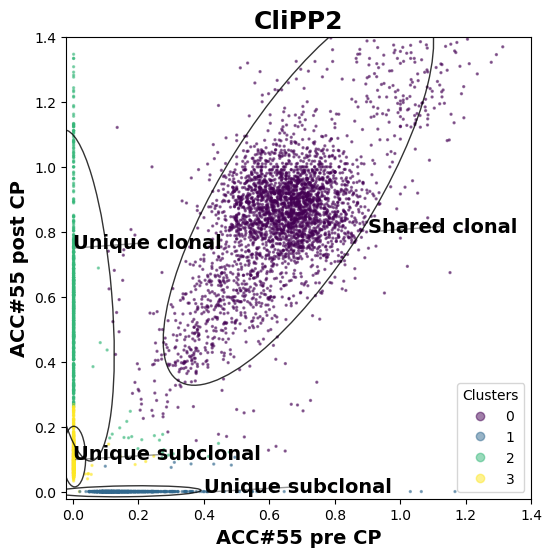

In [22]:
from matplotlib.patches import Ellipse
plt.figure(figsize=(6,6))

# Example scatter:
sc = plt.scatter(
    ccf_corrected[:, 1],  # x-values
    ccf_corrected[:, 0],  # y-values
    c=lab,
    cmap='viridis',
    s=2,
    alpha=0.5
)

plt.xlim(-0.02, 1.4)
plt.ylim(-0.02, 1.4)
plt.xlabel('ACC#55 pre CP', fontsize=14, fontweight='bold')
plt.ylabel('ACC#55 post CP', fontsize=14, fontweight='bold')
plt.title('CliPP2', fontsize=18, fontweight='bold')

# Legend
legend_handles, legend_labels = sc.legend_elements(prop="colors", alpha=0.5)
plt.legend(handles=legend_handles, labels=legend_labels, title="Clusters", loc="best")

def plot_cov_ellipse(mean, cov, ax, n_std=2.0, facecolor='none', edgecolor='black', **kwargs):
    """
    Plot an ellipse representing the contour of a 2D Gaussian distribution.
    """
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    # Sort eigenvalues in descending order
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]

    # Angle of ellipse in degrees
    angle = np.degrees(np.arctan2(*eigenvecs[:, 0][::-1]))

    # Ellipse width & height are 2*n_std*sqrt(eigenvals)
    width, height = 2 * n_std * np.sqrt(eigenvals)

    ellipse = Ellipse(
        xy=mean,
        width=width,
        height=height,
        angle=angle,
        facecolor=facecolor,
        edgecolor=edgecolor,
        **kwargs
    )
    ax.add_patch(ellipse)
    return ellipse

# --------------------------------------------------
# Define your manual annotation details here
# --------------------------------------------------
manual_annotations = {
    0: ("Shared clonal", (0.9, 0.8)),
    1: ("Unique subclonal", (0.4, 0)),
    2: ("Unique clonal", (0.0, 0.75)),
    3: ("Unique subclonal", (0.0, 0.1))
}

ax = plt.gca()
unique_clusters = np.unique(lab)

for c in unique_clusters:
    # Gather points for cluster c, reordering to [x, y]
    cluster_points = ccf_corrected[lab == c][:, [1, 0]]
    
    if len(cluster_points) < 2:
        continue
    
    mean = np.mean(cluster_points, axis=0)       # shape (2,)
    cov  = np.cov(cluster_points, rowvar=False)  # shape (2,2)

    # Plot a 2-sigma ellipse
    plot_cov_ellipse(mean, cov, ax, n_std=2.0, edgecolor='black', alpha=0.8)

    # ---------------------------------------------
    # Manually annotate each ellipse
    # ---------------------------------------------
    # If the cluster exists in manual_annotations, we use those coords/label.
    # Otherwise, we skip or fall back to some default.
    if c in manual_annotations:
        label_text, (x_anno, y_anno) = manual_annotations[c]
        ax.annotate(
            label_text,
            xy=(x_anno, y_anno),
            xytext=(0, 0),
            textcoords="offset points",
            fontsize=14,        # make text larger
            fontweight='bold',  # make text bold
            color='black',
            arrowprops=dict(arrowstyle='-', alpha=0.4)
        )

plt.grid(False)
plt.show()